# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The task is to determine the key features that influence the price of a used car. To do this, we will treat the price column as the target variable and use other columns such as year, manufacturer, model, condition, cylinders, fuel, odometer, transmission, drive, type, paint_color (one or many) as predictor variables. The problem is much likely to be a regression problem, where the goal is to build a predictive model to estimate car prices based on these features. Additionally, by examining the relationships between car price and each feature, we can help the used car dealership understand what consumers value most in a used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import warnings

In [88]:
# load data
warnings.filterwarnings(action="ignore")
car = pd.read_csv('data/vehicles.csv')

In [89]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [90]:
car.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [91]:
car.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
327586,7308055085,salem,2995,2006.0,honda,pilot,NaN,NaN,gas,309000.0,clean,other,2HKYF18636H524688,NaN,NaN,NaN,NaN,or
394935,7306327121,norfolk / hampton roads,15590,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,32573.0,clean,other,JTNKARJE9GJ510268,fwd,NaN,hatchback,green,va
111415,7316715154,south florida,3700,2008.0,volkswagen,passat,excellent,NaN,gas,132000.0,clean,automatic,NaN,NaN,NaN,NaN,black,fl
47780,7305864567,redding,9999,2011.0,mercedes-benz,glk-class,excellent,6 cylinders,gas,143062.0,clean,automatic,WDCGG5GBXBF533238,rwd,full-size,SUV,white,ca
95430,7310817971,ft myers / SW florida,0,2010.0,NaN,-,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl


In [92]:
# I found records with Value, then we need to clean the data
car.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [93]:
car.shape

(426880, 18)

In [94]:
# Get missing count for each column
miss_count = car.isnull().sum().sort_values()
total_count = car.shape[0]
non_zero_missing = miss_count[miss_count > 0]
# Calculate the missing percentage for each column> 0]
missing_percentage = non_zero_missing / total_count * 100
missing_percentage

year             0.282281
transmission     0.598763
fuel             0.705819
odometer         1.030735
model            1.236179
title_status     1.930753
manufacturer     4.133714
type            21.752717
paint_color     30.501078
drive           30.586347
VIN             37.725356
condition       40.785232
cylinders       41.622470
size            71.767476
dtype: float64

Per missing rate, here is my thinking and treatment
- year 0.28 median
- transmission	0.6	mode
- fuel	0.71 mode
- odometer	1.03	median
- model	1.24	mode
- title_status	1.93	mode
- manufacturer	4.13	mode
- type	21.76	'Unknown'
- paint_color	30.51	'Unknown'
- drive	30.6	'Unknown'
- VIN	37.74	  Drop column (it wont affect price)
- condition	40.8	Drop (too many missing data)
- cylinders	41.6	Drop
- size	71.77	Drop column

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [95]:
car_clean = car.copy()
# Drop 'type','VIN', 'condition', 'cylinders', 'size' for high missing rate
car_clean.drop(columns=['type','VIN', 'condition', 'cylinders', 'size'], inplace=True)

In [113]:
# Convert all columns of object type to string
car_clean = car_clean.apply(lambda col: col.astype(str) if col.dtype == 'object' else col)
mean_year = car_clean['year'].mean()
car_clean['year'].fillna(mean_year, inplace=True)
# fill transmission
car_clean['transmission'].fillna(car_clean['transmission'].mode()[0], inplace=True)
# fill fuel
car_clean['fuel'].fillna(car_clean['fuel'].mode()[0], inplace=True)
# fill odometer
car_clean['odometer'] = car_clean['odometer'].astype(float)
car_clean['odometer'].fillna(car_clean['odometer'].mean(), inplace=True)
# fill model
car_clean['model'].fillna(car_clean['model'].mode(), inplace=True)
car_clean['model'] = car_clean['model'].replace('nan', car_clean['model'].mode()[0])
# fill title_status
car_clean['title_status'].fillna(car_clean['title_status'].mode(), inplace=True)
# fill manufacturer
car_clean['manufacturer'].fillna(car_clean['manufacturer'].mode(), inplace=True)
# fill type/paint/drive
car_clean['paint_color'].fillna('Unknown', inplace=True)
car_clean['drive'].fillna('Unknown', inplace=True)

In [114]:
# Double if any null value left
car_clean.isnull().sum().sort_values()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
state           0
dtype: int64

##  Check for Duplicate Data

In [98]:
car_clean.drop_duplicates(inplace=True)

## Plot

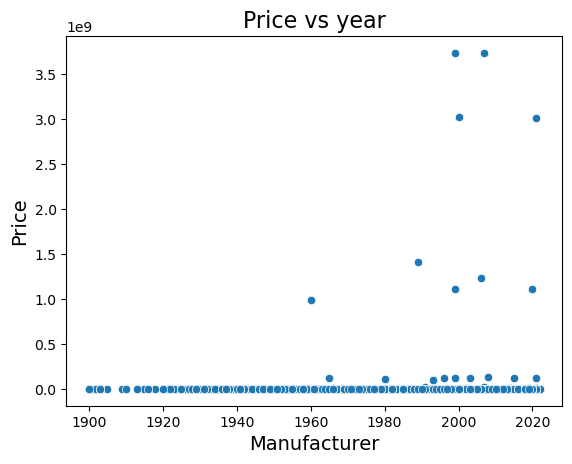

In [99]:
# I want to use scatter plot to see below columns's relationship with price
# year
# manufacturer
# model
# odometer
# type
# state

sns.scatterplot(x='year', y='price', data=car_clean)
plt.title('Price vs year', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()
# I can clear see price goes high as year is newer, I will pick it in training set

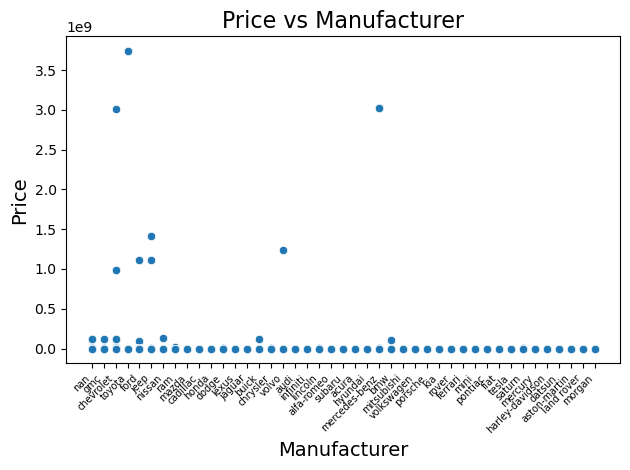

In [100]:
sns.scatterplot(x='manufacturer', y='price', data=car_clean)
plt.xticks(rotation=45, fontsize=7, ha='right')  # Adjust rotation, font size, and alignment
plt.title('Price vs Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.show()
# looks like different manufacture does not make price changes differently, I will ignore it from training data.

In [101]:
#print(car_clean['model'].mode()[0])
#print(car_clean['model'].unique())
# Found model with / and $, I need to remove, otherwise plot does not work.
car_clean['model'] = car_clean['model'].str.replace(r'[\$\\]', '', regex=True)
print(car_clean['model'].unique())
# sns.scatterplot(x='model', y='price', data=car_clean) import image, otherwise it is so slow to generate each time.
# Originally I want to pick model but it is has 29649 value which is hard to do hot encoding, Thereforce I drop it.

['f-150' 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']


<center>
    <img src = images/model-price.png width = 250%/>
</center>

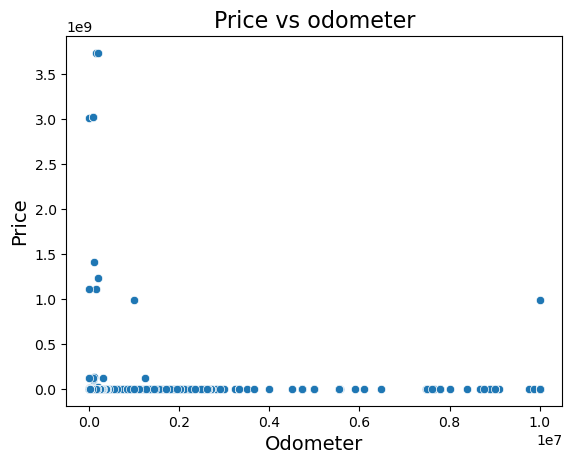

In [102]:
sns.scatterplot(x='odometer', y='price', data=car_clean)
plt.title('Price vs odometer', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()
# odometer is high correlate with price -> pick

['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']


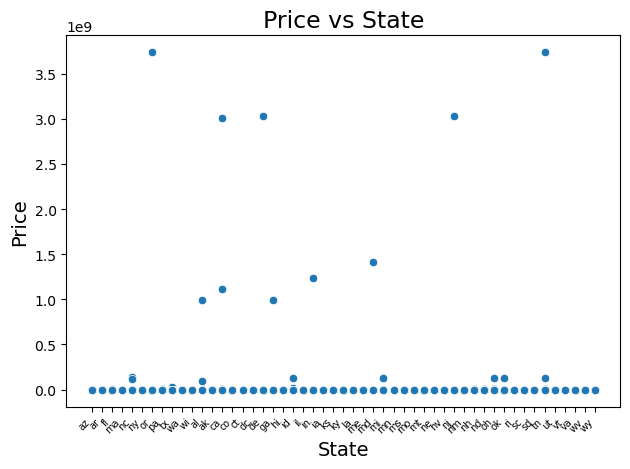

In [103]:
print(car_clean['state'].unique())
sns.scatterplot(x='state', y='price', data=car_clean)
plt.xticks(rotation=45, fontsize=7, ha='right')  # Adjust rotation, font size, and alignment
plt.title('Price vs State', fontsize=17)
plt.xlabel('State', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.show()
# Per my obervation, the state with better economic wealth may poential has higher selling price 
# compareing the one with less economic wealth, therefore I will pick state as factor as well.

Therefore, I will pick year, odometer and state as training data to predict car price

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [104]:
# Since I am picking up year , odometer and state
# year and odometer are numeric, I am planning is onehotencoder to transfrom state to numeric
# I am using lineargression model to train the data and give perdiction.

In [123]:
car_final = car_clean.copy()
car_final = car_clean[['price', 'year', 'odometer', 'state']]
car_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     426880 non-null  int64  
 1   year      426880 non-null  float64
 2   odometer  426880 non-null  float64
 3   state     426880 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 13.0+ MB


In [124]:
# one-hot coding for state
car_final = pd.get_dummies(car_final, columns=['state'])

In [125]:
# typecat true false to 0 and 1
car_final = car_final.astype(int)

In [126]:
car_final.sample(1)

,price,year,odometer,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
147417,28925,2016,38029,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


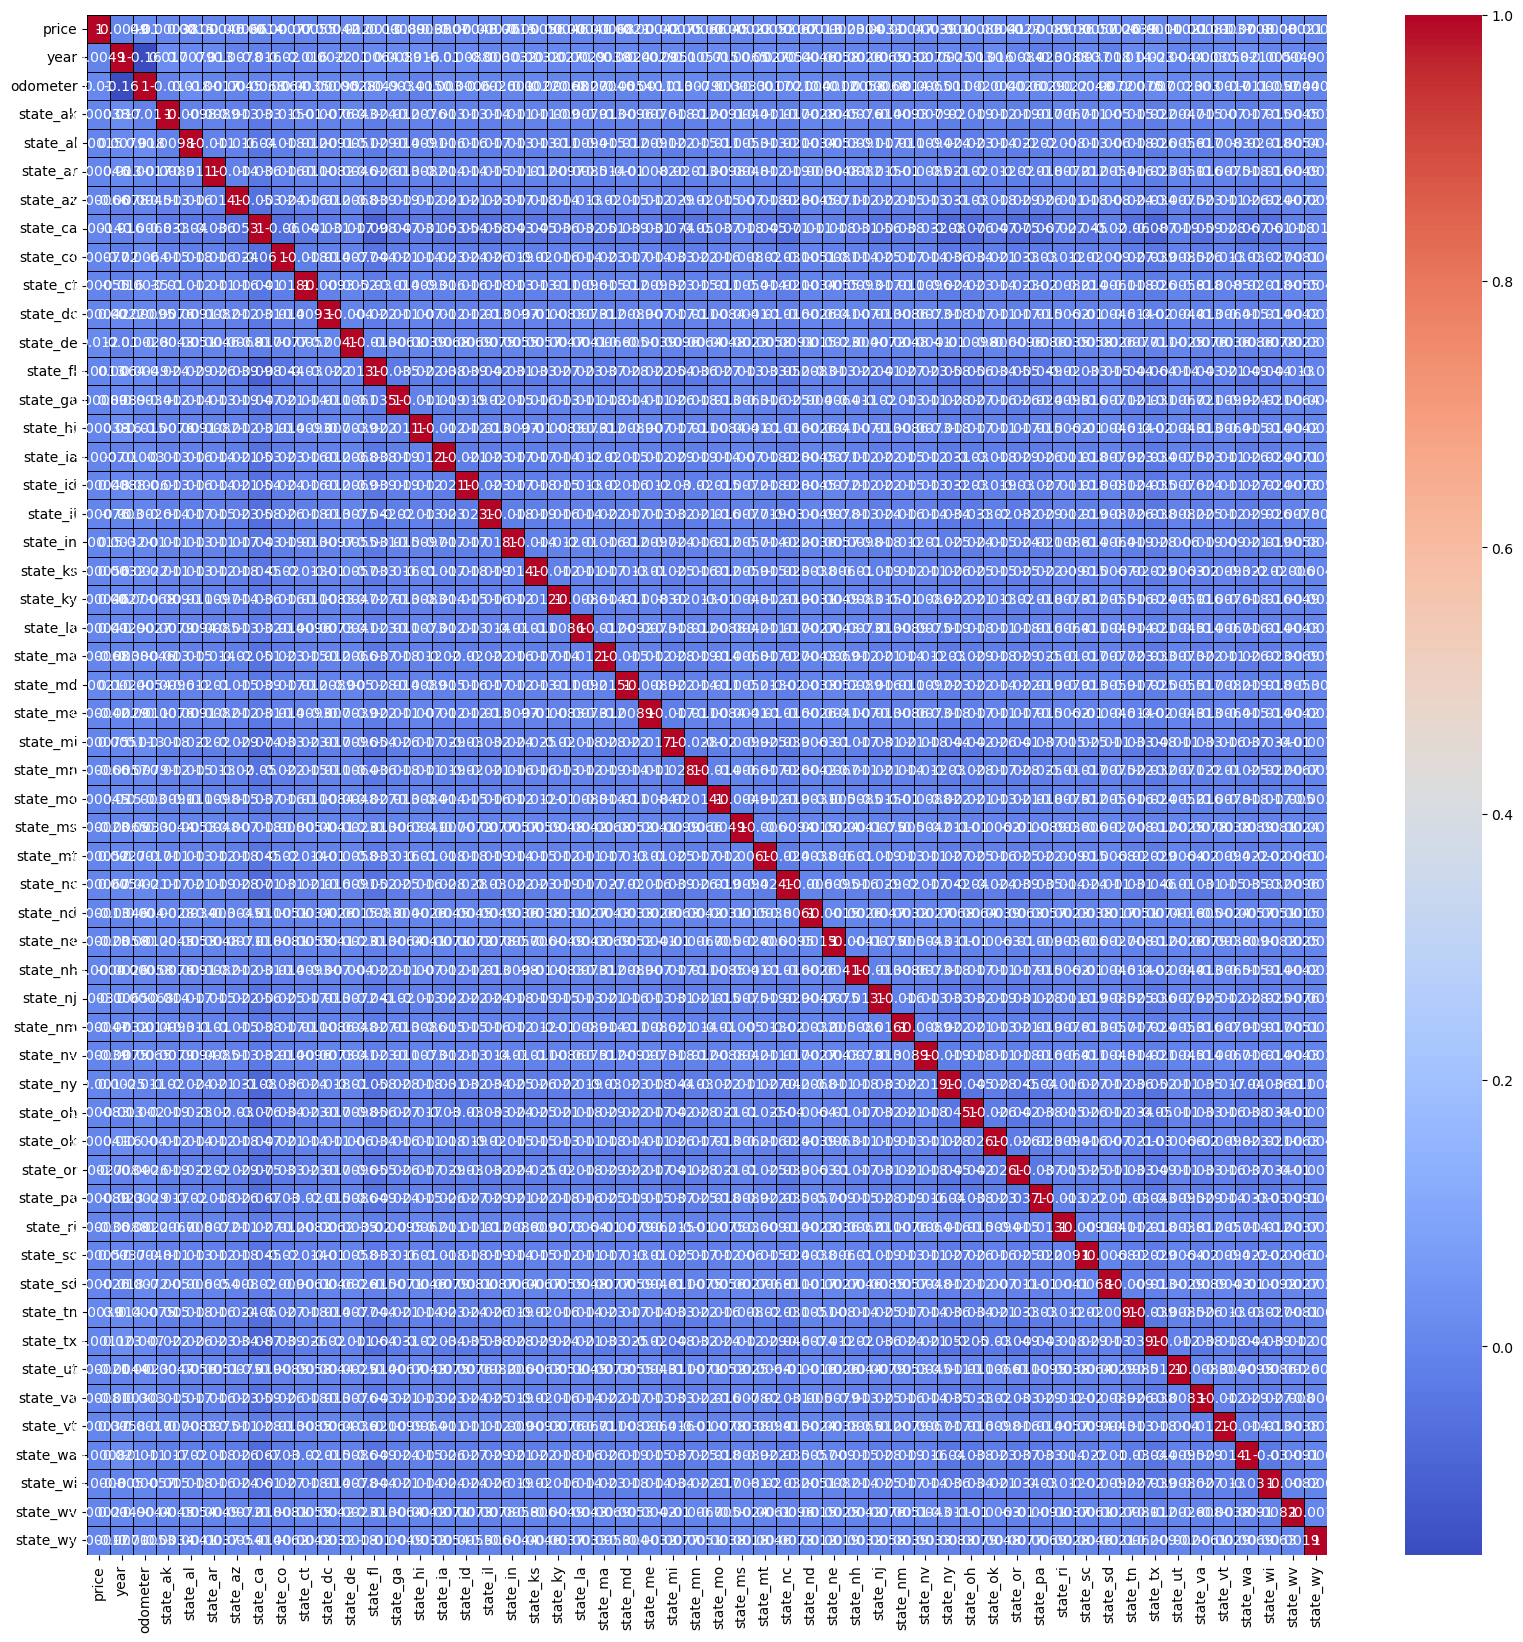

In [127]:
corr = car_final.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black',
            xticklabels=corr.columns, yticklabels=corr.columns)  # Consider turning off annotations for speed
plt.show()

In [128]:
# Due to one-hot coding, it create too many columns and 
# I found my computer was really running slow if using above training set.
# I will only keep year and odometer
car_final = car_clean.copy()
car_final = car_clean[['price', 'year', 'odometer']]
car_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     426880 non-null  int64  
 1   year      426880 non-null  float64
 2   odometer  426880 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.8 MB


In [129]:
# Somehow based on common sense, year and odometer should determine the car sale price
# but based on heapmap, I do not see strong linear correlation.
# Also based on scatterplot previously, it might not looks like linear relationship.
# Therefore, I am thinking to use PolynomialFeatures
X = car_final.drop(columns=['price'])
y = car_final['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=16)
# Printing shapes of the sets
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('x_test:', y_test.shape,'\n')

# Creat pipeline with PolynomialFeatures degree = 3 and train data
pipe_model = Pipeline([('PolyFeatures',PolynomialFeatures(degree = 3, include_bias=False)),('LinModel',LinearRegression())])
pipe_model.fit(x_train,y_train)

x_train: (341504, 2)
y_train: (341504,)
x_test: (85376, 2)
x_test: (85376,) 



Pipeline(steps=[('PolyFeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('LinModel', LinearRegression())])

In [130]:
y_train_pred = pipe_model.predict(x_train)
y_test_pred = pipe_model.predict(x_test)
print(y_train_pred.mean())
print(y_test_pred.mean())

67472.37442217716
67388.21257439614


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [131]:
# Check error using mean squared erorr
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for training data: {mse_train}')
print(f'MSE for test data: {mse_test}')

MSE for training data: 117761355126433.25
MSE for test data: 270807325950282.3


In [132]:
# Calculate the permutation importance
results = permutation_importance(pipe_model, x_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Report: Key For Used Car Prices

# Introduction

This report provides insights into the factors that most significantly impact the price of used cars, based on an analysis of a dataset containing information on over 400,000 vehicles. The aim is to help the dealership optimize their inventory strategy, make informed purchasing decisions, and effectively price vehicles to align with market trends and consumer preferences.

## Primary Findings

- Year of Manufacture

    * Newer cars tend to be priced higher, with a clear positive correlation between the year of manufacture and car price. However, the impact starts to diminish for vehicles older than 10 years, indicating that beyond a certain age, the vehicle's condition and mileage become more influential.

- Mileage (Odometer Reading)

    * Mileage is a key driver of used car prices. Cars with lower mileage generally command higher prices, as consumers perceive them as having less wear and tear. Vehicles with fewer miles are often considered more reliable and likely to require fewer repairs.

- Manufacturer and Model

    * Certain manufacturers, such as Toyota, Honda, and Ford, have shown a higher resale value compared to others. Popular models within these brands, like the Toyota Camry or Honda Civic, maintain their value longer due to high demand and reliability.

## Recommendations for Inventory Management

- Focus on Low-Mileage Vehicles: Prioritize acquiring vehicles with lower mileage, especially those under 50,000 miles, as these tend to sell faster and at higher prices.

- Emphasize Reliable Brands and Models: Focus on acquiring well-regarded brands like Toyota and Ford. High-demand models retain their value longer and are easier to sell.

## Conclusion
- By focusing on factors like vehicle age, mileage, condition, and brand, the dealership can make more strategic purchasing decisions. These insights will help maximize profitability, reduce time on the lot, and better align inventory with customer demand. 